In [101]:
import numpy as np

X = np.concatenate([np.random.normal(20, 10, (10, 1)), np.random.normal(80, 10, (10, 1))])

In [102]:
print(X)

[[ 20.75171836]
 [ 12.5148424 ]
 [ 20.09727351]
 [ 21.81124899]
 [ 25.6481672 ]
 [ 24.72150424]
 [ 10.469643  ]
 [ 24.54124228]
 [ 25.57728973]
 [ 25.28482888]
 [ 89.32067953]
 [ 77.92231808]
 [ 64.32990165]
 [ 72.46108133]
 [ 83.30708404]
 [ 83.80219793]
 [100.52152935]
 [ 78.77635269]
 [ 69.2217132 ]
 [ 85.13585103]]


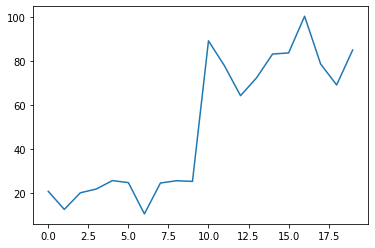

In [103]:
import matplotlib.pyplot as plt

plt.plot(X)
plt.show()

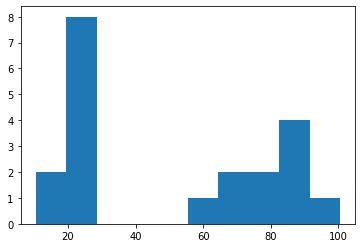

In [104]:
import matplotlib.pyplot as plt

plt.hist(X)
plt.show()

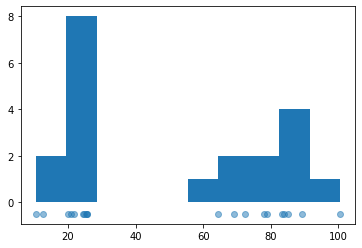

In [105]:
plt.scatter(X, [-0.5 for x in X], alpha=0.5)
plt.hist(X)
plt.show()

In [106]:
from sklearn.neighbors import NearestNeighbors

n_neighbors = 3
model = NearestNeighbors(n_neighbors=n_neighbors)
model.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [107]:
distances, indices = model.kneighbors(X)

In [108]:
distances

array([[ 0.        ,  0.65444485,  1.05953064],
       [ 0.        ,  2.0451994 ,  7.5824311 ],
       [ 0.        ,  0.65444485,  1.71397549],
       [ 0.        ,  1.05953064,  1.71397549],
       [ 0.        ,  0.07087746,  0.36333832],
       [ 0.        ,  0.18026196,  0.56332464],
       [ 0.        ,  2.0451994 ,  9.62763051],
       [ 0.        ,  0.18026196,  0.7435866 ],
       [ 0.        ,  0.07087746,  0.29246085],
       [ 0.        ,  0.29246085,  0.36333832],
       [ 0.        ,  4.1848285 ,  5.5184816 ],
       [ 0.        ,  0.85403461,  5.38476596],
       [ 0.        ,  4.89181156,  8.13117968],
       [ 0.        ,  3.23936813,  5.46123675],
       [ 0.        ,  0.49511389,  1.82876699],
       [ 0.        ,  0.49511389,  1.3336531 ],
       [ 0.        , 11.20084982, 15.38567832],
       [ 0.        ,  0.85403461,  4.53073135],
       [ 0.        ,  3.23936813,  4.89181156],
       [ 0.        ,  1.3336531 ,  1.82876699]])

In [109]:
indices

array([[ 0,  2,  3],
       [ 1,  6,  2],
       [ 2,  0,  3],
       [ 3,  0,  2],
       [ 4,  8,  9],
       [ 5,  7,  9],
       [ 6,  1,  2],
       [ 7,  5,  9],
       [ 8,  4,  9],
       [ 9,  8,  4],
       [10, 19, 15],
       [11, 17, 14],
       [12, 18, 13],
       [13, 18, 11],
       [14, 15, 19],
       [15, 14, 19],
       [16, 10, 19],
       [17, 11, 14],
       [18, 13, 12],
       [19, 15, 14]])

In [110]:
distances[:, n_neighbors - 1]

array([ 1.05953064,  7.5824311 ,  1.71397549,  1.71397549,  0.36333832,
        0.56332464,  9.62763051,  0.7435866 ,  0.29246085,  0.36333832,
        5.5184816 ,  5.38476596,  8.13117968,  5.46123675,  1.82876699,
        1.3336531 , 15.38567832,  4.53073135,  4.89181156,  1.82876699])

In [111]:
sorted(distances[:, n_neighbors - 1])

[0.292460853825105,
 0.363338316311566,
 0.363338316311566,
 0.5633246362170858,
 0.7435866008339431,
 1.0595306364584722,
 1.3336530961538102,
 1.7139754882638485,
 1.7139754882638485,
 1.8287669880534594,
 1.8287669880534594,
 4.530731347327446,
 4.891811555946603,
 5.384765959651958,
 5.461236748760513,
 5.518481596027172,
 7.58243110342551,
 8.131179680971542,
 9.627630506488126,
 15.385678321492605]

In [113]:
out = 0.2
int((len(X) - 1) * (1 - out))

15

In [115]:
out = 0.2
threshold = sorted(distances[:, n_neighbors - 1])[int((len(X) - 1) * (1 - out))]
threshold

5.518481596027172

In [116]:
def transform(x):
    distances, indices = model.kneighbors(x)
    return distances[:, n_neighbors - 1]

In [117]:
x_latent = np.linspace(0, 100, 101).reshape(101, 1)

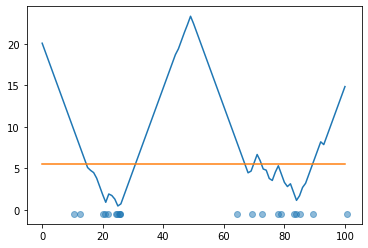

In [119]:
plt.plot(x_latent, transform(x_latent))
plt.plot([0, 100], [threshold, threshold])
plt.scatter(X, [-0.5 for x in X], alpha=0.5)
plt.show()

In [120]:
from sklearn.svm import OneClassSVM

model = OneClassSVM()
model.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [121]:
score = model.decision_function(X)
score

array([ 8.92465609e-03, -3.02868060e-01,  2.17041910e-04,  1.74354569e-02,
       -5.03609251e-03,  7.48946979e-03, -4.47230183e-01,  9.43240536e-03,
       -3.93200969e-03,  3.71794320e-04, -2.40044114e-01,  7.61273222e-02,
       -2.76348055e-01, -2.94366299e-04,  1.32090921e-02, -2.94462081e-04,
       -1.15702272e+00,  7.60775219e-02, -9.54251920e-02, -4.32865920e-02])

In [122]:
sorted(score)

[-1.1570227225254408,
 -0.447230183106222,
 -0.30286805991985855,
 -0.27634805498651005,
 -0.24004411384425062,
 -0.09542519199123145,
 -0.04328659196363738,
 -0.005036092513797108,
 -0.003932009693181193,
 -0.0002944620810989562,
 -0.000294366299088189,
 0.0002170419098881382,
 0.00037179432008915825,
 0.00748946978528231,
 0.008924656092618832,
 0.009432405362153062,
 0.013209092097701713,
 0.017435456884351552,
 0.07607752185616867,
 0.0761273221584906]

In [125]:
out = 0.2
int((len(X) - 1) * out)

3

In [126]:
out = 0.2
threshold = sorted(score)[int((len(X) - 1) * out)]
threshold

-0.27634805498651005

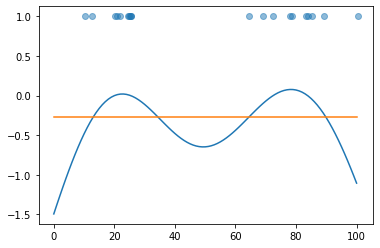

In [127]:
plt.plot(x_latent, model.decision_function(x_latent))
plt.plot([0, 100], [threshold, threshold])
plt.scatter(X, [1 for x in X], alpha=0.5)
plt.show()